### Ford Car Price prediction : EDA
#### By : Shivam Singh


In [14]:
#import manipulation libaries 
import numpy as np
import pandas as pd

# import visualization libaries
import seaborn as sns
import matplotlib.pyplot as plt

# import warnings to filterout warnings
import warnings
warnings.filterwarnings('ignore')

# import orderdict
from collections import OrderedDict

In [5]:
df = pd.read_csv(r'C:\15Days15Project\Ford-Car-Price-Prediction\data\ford.csv')


In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [13]:
df.shape

(17966, 9)

<Axes: xlabel='price', ylabel='Count'>

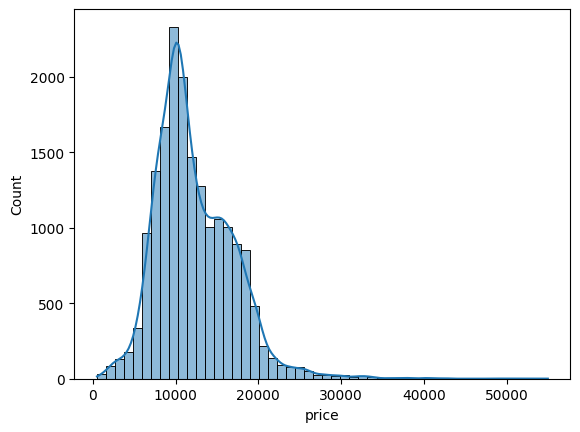

In [12]:
sns.histplot(data = df['price'], kde= True, bins= 50)

In [64]:
# Descriptive stats

def descriptive_stats(df):
    numerical_col = df.select_dtypes(exclude='object').columns
    categorical_col = df.select_dtypes(include='object').columns
    
    num_stats = []
    cat_stats = []
    data_info = []

    for i in numerical_col:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        LF = Q1 - (1.5*IQR)
        UF = Q3 + (1.5*IQR)

        outlier_count = len(df[(df[i]< LF) | (df[i] > UF)])
        outlier_percentage = outlier_count / len(df[i]) *100

        numerical_stats = OrderedDict({
            "feature " : i , 
            "Q1" : Q1,
            "Q3" : Q3,
            "IQR" : IQR,
            "LF" : LF,
            "UF" : UF,
            "Mean" : df[i].mean(),
            "Median" : df[i].median(),
            "Min" : df[i].min(),
            "Max" : df[i].max(),
            "Outlier count" : outlier_count,
            "outlier percentage" : outlier_percentage,
            "standard derivation": df[i].std(),
            "variance" : df[i].var(),
            "skewness" : df[i].skew(),
            "kurtosis" : df[i].kurtosis()
        })
        num_stats.append(numerical_stats)
    numerical_stats_report = pd.DataFrame(num_stats)

    for i in categorical_col:
        categorical_stats = OrderedDict({
            "feature" : i ,
            "Unqiue count" : df[i].nunique(),
            "value count" : df[i].value_counts(),
            "mode" : df[i].mode()
        })
        cat_stats.append(categorical_stats)
        categorical_stats_report = pd.DataFrame(cat_stats)
    
    for i in df.columns:
        data_info1 = OrderedDict({
            "Feature " : i ,
            "Missing_Values": df[i].isnull().sum(),
            "Unique_Values": df[i].nunique(),
            "Value_Counts": df[i].value_counts().to_dict()
        })
        data_info.append(data_info1)
        data_info_report = pd.DataFrame(data_info)


    return numerical_stats_report,categorical_stats_report,data_info_report

num_stats_report,categorical_stats_report ,data_info_report = descriptive_stats(df)

In [65]:
# Numerical stats
num_stats_report

,feature,Q1,Q3,IQR,LF,UF,Mean,Median,Min,Max,Outlier count,outlier percentage,standard derivation,variance,skewness,kurtosis
0,year,2016.0,2018.0,2.0,2013.00,2021.00,2016.866470,2017.0,1996.0,2060.0,499,2.777469,2.050336,4.203878e+00,-1.282601,17.035511
1,price,8999.0,15299.0,6300.0,-451.00,24749.00,12279.534844,11291.0,495.0,54995.0,286,1.591896,4741.343657,2.248034e+07,1.096457,3.261460
2,mileage,9987.0,31060.0,21073.0,-21622.50,62669.50,23362.608761,18242.5,1.0,177644.0,878,4.887009,19472.054349,3.791609e+08,1.842068,4.995556
3,tax,30.0,145.0,115.0,-142.50,317.50,113.329456,145.0,0.0,580.0,20,0.111321,62.012456,3.845545e+03,-0.564082,1.312906
4,mpg,52.3,65.7,13.4,32.20,85.80,57.906980,58.9,20.8,201.8,216,1.202271,10.125696,1.025297e+02,0.603923,11.438242
5,engineSize,1.0,1.5,0.5,0.25,2.25,1.350807,1.2,0.0,5.0,190,1.057553,0.432367,1.869415e-01,1.893121,11.293711


In [33]:
# categorical stats
categorical_stats_report

,feature,Unqiue count,value count,mode
0,model,24,model Fiesta 6557 Focus ...,"0 Fiesta Name: model, dtype: object"
1,transmission,3,transmission Manual 15518 Automatic ...,"0 Manual Name: transmission, dtype: object"
2,fuelType,5,fuelType Petrol 12179 Diesel 5762 H...,"0 Petrol Name: fuelType, dtype: object"


In [35]:
# Data info 
data_info_report

,Feature,Missing_Values,Unique_Values,Value_Counts
0,model,0,24,"{' Fiesta': 6557, ' Focus': 4588, ' Kuga': 222..."
1,year,0,23,"{2017: 4888, 2018: 4014, 2019: 3194, 2016: 233..."
2,price,0,3511,"{10000: 164, 11000: 153, 10500: 148, 12000: 12..."
3,transmission,0,3,"{'Manual': 15518, 'Automatic': 1361, 'Semi-Aut..."
4,mileage,0,13528,"{10: 40, 15000: 38, 25000: 34, 10000: 32, 6000..."
5,fuelType,0,5,"{'Petrol': 12179, 'Diesel': 5762, 'Hybrid': 22..."
6,tax,0,36,"{145: 8944, 0: 2153, 150: 1944, 125: 1407, 30:..."
7,mpg,0,90,"{65.7: 2528, 54.3: 1774, 60.1: 1674, 64.2: 995..."
8,engineSize,0,16,"{1.0: 7765, 1.5: 3418, 2.0: 3311, 1.2: 1626, 1..."


<Axes: >

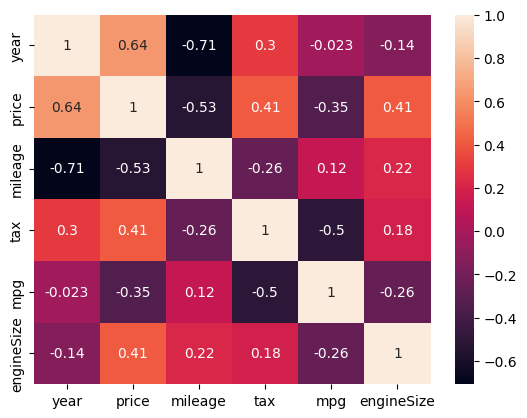

In [40]:
sns.heatmap(df.corr(numeric_only= True),annot= True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2060')])

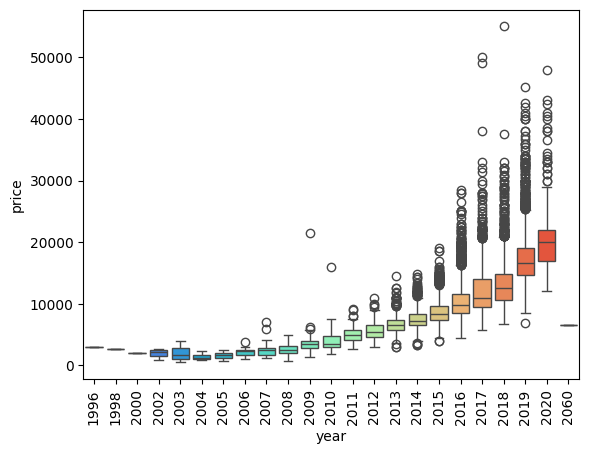

In [49]:
sns.boxplot(data= df , x= 'year',y= 'price', palette= 'rainbow')
plt.xticks(rotation = 90)

<Axes: xlabel='mileage', ylabel='price'>

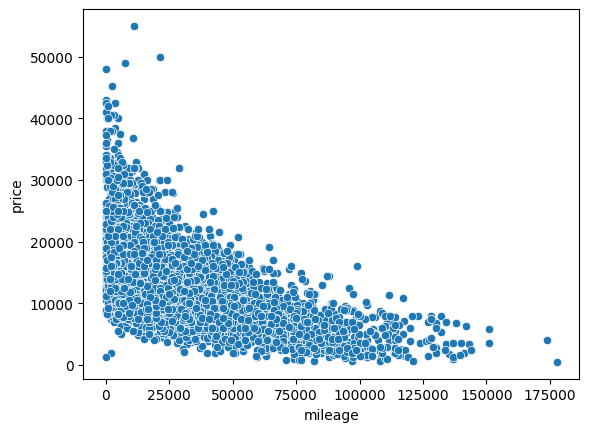

In [45]:
sns.scatterplot(data = df , x = 'mileage' , y = 'price')

<Axes: xlabel='engineSize', ylabel='price'>

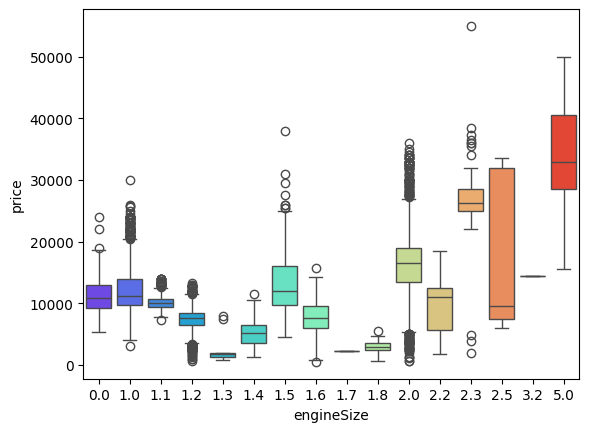

In [48]:
sns.boxplot(data = df , x = 'engineSize' , y = 'price', palette= 'rainbow')

<Axes: xlabel='transmission', ylabel='price'>

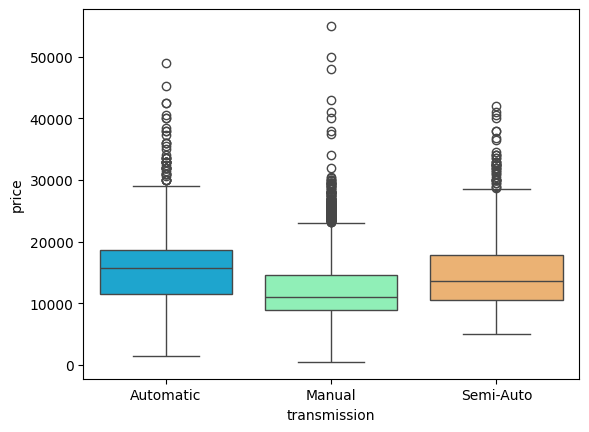

In [57]:
sns.boxplot(data= df, x= 'transmission', y= 'price', palette='rainbow')

<Axes: xlabel='fuelType', ylabel='price'>

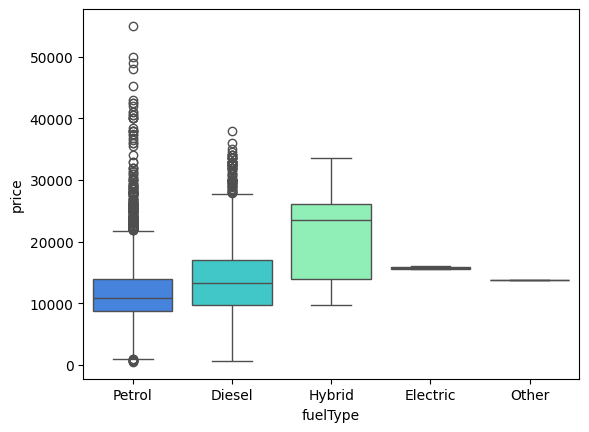

In [60]:
sns.boxplot(data= df, x= 'fuelType',y = 'price', palette= 'rainbow')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

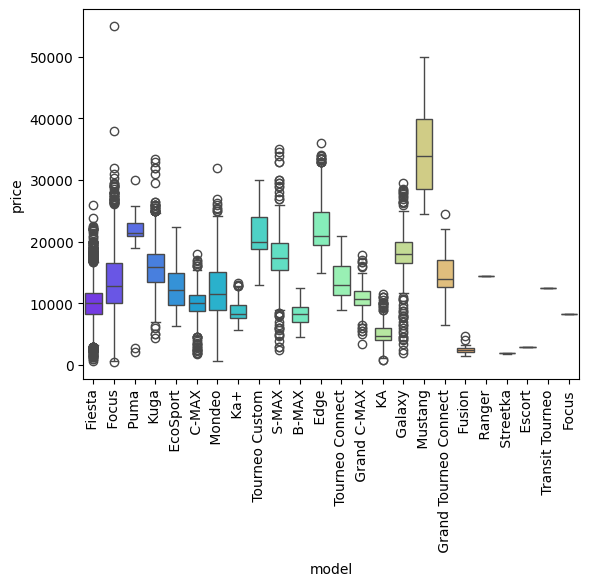

In [63]:
sns.boxplot(x = df['model'],y = df['price'], palette='rainbow')
plt.xticks(rotation = 90)

### Data Insights
1. Price is target column
2. Mean =! Median i.e data is non-normal distribution 
3. Highest outlier percentage is 4.88 which is manageable , we can replace with mean value but , mileage play a important role that why i am not removing outlier
4. There is no missing value 
